# DATA

Study of a dataset cotaining various information about 32135 games published on Steam gaming plataform.

| Columna | Descripción | Ejemplo |
| -- | - | - |
| publisher | Empresa publicadora del contenido | [Ubisoft,Dovetail Games - Trains,Degica] |
| genres | Genero del contenido | [Action, Adventure, Racing, Simulation, Strategy] |
| app_name | Nombre del contenido | [Warzone, Soundtrack, Puzzle Blocks] |
| title | Titulo del contenido | [The Dream Machine: Chapter 4 , Fate/EXTELLA - Sweet Room Dream, Fate/EXTELLA - Charming Bunny] |
| url | URL de publicación del contenido | http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/ |
| release_date | Fecha de lanzamiento | [2018-01-04] |
| tags | etiquetas de contenido | [Simulation, Indie, Action, Adventure, Funny, Open World, First-Person, Sandbox, Free to Play] |
| discount_price | precio de descuento | [22.66, 0.49, 0.69] |
| reviews_url | Reviews de contenido | http://steamcommunity.com/app/681550/reviews/?browsefilter=mostrecent&p=1 |
| specs | Especificaciones | [Multi-player, Co-op, Cross-Platform Multiplayer, Downloadable Content] |
| price | Precio del contenido | [4.99, 9.99, Free to Use, Free to Play] |
| early_access | acceso temprano | [False, True] |
| id | identificador unico de contenido | [761140, 643980, 670290] |
| developer | Desarrollador | [Kotoshiro, Secret Level SRL, Poolians.com] |
| sentiment | Análisis de sentimiento | [Mixed, Very Positive, Positive, 3 user reviews] |
| metascore | Score por metacritic | [80, 74, 77, 75] |



# EDA

Make an EDA to understand the data and prepare a model to predict the price.


    def predicción( genero, earlyaccess = True/False, (Variables que elijas) ): Ingresando estos parámetros, deberíamos recibir el precio y RMSE.

Import relevant libraries.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

Opening the JSON with the correct format that we exported in preprocessing.

In [33]:
rawGamesDf = pd.read_json("datasets/steam_games_format_ok.json")

In [34]:
cleanedGamesDf = rawGamesDf
cleanedGamesDf.head()

,publisher,genres,app_name,tags,discount_price,specs,price,early_access,id,developer,sentiment,metascore,year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,761140.0,Kotoshiro,None,None,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,None,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,None,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,767400.0,彼岸领域,None,None,2017
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,772540.0,Trickjump Games Ltd,Mixed,None,2018


## Basic Info

In [35]:
# Column names
cleanedGamesDf.columns

Index(['publisher', 'genres', 'app_name', 'tags', 'discount_price', 'specs',
       'price', 'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'year'],
      dtype='object')

In [36]:
cleanedGamesDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29904 entries, 0 to 32133
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23936 non-null  object 
 1   genres          28699 non-null  object 
 2   app_name        29904 non-null  object 
 3   tags            29743 non-null  object 
 4   discount_price  204 non-null    float64
 5   specs           29238 non-null  object 
 6   price           28759 non-null  object 
 7   early_access    29904 non-null  bool   
 8   id              29903 non-null  float64
 9   developer       28684 non-null  object 
 10  sentiment       23096 non-null  object 
 11  metascore       2622 non-null   object 
 12  year            29904 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 3.0+ MB


## Columns: app_name, id
The information on those 2 columns are unique to each game, so they will not provide much information and that's why we will drop them. Title was already drop before.

In [37]:
cleanedGamesDf.drop(columns=['app_name', 'id'], inplace=True)

In [38]:
cleanedGamesDf.head()

,publisher,genres,tags,discount_price,specs,price,early_access,developer,sentiment,metascore,year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,None,None,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Secret Level SRL,Mostly Positive,None,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Poolians.com,Mostly Positive,None,2017
3,彼岸领域,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,None,None,2017
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,None,2018


---

## Function to describe columns

In [39]:
def column_describe(name):
    """
    Basic description of a categorical column.
    """
    print('Describe:')
    print(cleanedGamesDf[name].describe())
    print('')
    print('Unique Values:')
    print(cleanedGamesDf[name].unique())
    print('')
    print('NaN amount:', cleanedGamesDf[name].isna().sum())

## publisher

In [40]:
column_describe('publisher')

Describe:
count       23936
unique       8167
top       Ubisoft
freq          385
Name: publisher, dtype: object

Unique Values:
['Kotoshiro' 'Making Fun, Inc.' 'Poolians.com' ... 'OrtiGames/OrtiSoft'
 'INGAME' 'Bidoniera Games']

NaN amount: 5968


## developer

In [41]:
column_describe('developer')

Describe:
count                       28684
unique                      10913
top       Ubisoft - San Francisco
freq                         1259
Name: developer, dtype: object

Unique Values:
['Kotoshiro' 'Secret Level SRL' 'Poolians.com' ...
 'Oscar Ortigueira López,OrtiGames/OrtiSoft' 'INGAME' 'Bidoniera Games']

NaN amount: 1220


This two columns there are a lot of unique values and a lot of NaNs, we could try label encoding, but for now we will drop them.

In [42]:
cleanedGamesDf.drop(columns=['publisher', 'developer'], inplace=True)

In [43]:
cleanedGamesDf.head()

,genres,tags,discount_price,specs,price,early_access,sentiment,metascore,year
0,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,None,None,2018
1,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018
2,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017
3,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,None,None,2017
5,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018


---

## Column: genres, tags and specs

We need to start working with genres, because it's a column containing a list of different items. We should try to make a column for each genre.

In [44]:
print('Describe:')
print(cleanedGamesDf['genres'].describe())
print('')
print('NaN amount:', cleanedGamesDf['genres'].isna().sum())

Describe:
count        28699
unique         881
top       [Action]
freq          1875
Name: genres, dtype: object

NaN amount: 1205


In [45]:
genresCompleteList = cleanedGamesDf.explode(column=['genres'])['genres'].unique()
print(genresCompleteList)
print(genresCompleteList.shape)

['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' 'Racing' None 'Massively Multiplayer' 'Early Access'
 'Animation &amp; Modeling' 'Video Production' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Photo Editing' 'Accounting']
(23,)


We have 23 genres, **WE NEED TO DECIDE WHAT TO DO WITH THE NaN category**

We could use a groupby and get dummies to get all the genre columns.

In [46]:
cleanedGamesDf.explode(column=['genres'])['genres'].value_counts()

genres
Indie                        15759
Action                       11247
Casual                        8251
Adventure                     8177
Strategy                      6927
Simulation                    6667
RPG                           5447
Free to Play                  2026
Early Access                  1445
Sports                        1254
Massively Multiplayer         1105
Racing                        1080
Design &amp; Illustration      460
Utilities                      338
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [47]:
# Using pd.get_dummies() method
genresDummies = pd.get_dummies(cleanedGamesDf['genres'].apply(pd.Series).stack(), prefix='genre').groupby(level=0).sum()
genresDummies.head()

,genre_Accounting,genre_Action,genre_Adventure,genre_Animation &amp; Modeling,genre_Audio Production,genre_Casual,genre_Design &amp; Illustration,genre_Early Access,genre_Education,genre_Free to Play,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We can correct & amp ; to &.

In [48]:
genresDummies.rename({"genre_Animation &amp; Modeling": "genre_Animation & Modeling", "genre_Design &amp; Illustration": "genre_Design & Illustration"}, axis='columns', inplace=True)

In [49]:
genresDummies.columns

Index(['genre_Accounting', 'genre_Action', 'genre_Adventure',
       'genre_Animation & Modeling', 'genre_Audio Production', 'genre_Casual',
       'genre_Design & Illustration', 'genre_Early Access', 'genre_Education',
       'genre_Free to Play', 'genre_Indie', 'genre_Massively Multiplayer',
       'genre_Photo Editing', 'genre_RPG', 'genre_Racing', 'genre_Simulation',
       'genre_Software Training', 'genre_Sports', 'genre_Strategy',
       'genre_Utilities', 'genre_Video Production', 'genre_Web Publishing'],
      dtype='object')

In [50]:
# Let's merge the new genres data with the original DataFrame.
cleanedGamesDf = cleanedGamesDf.merge(genresDummies, left_index=True, right_index=True)

# Now we will also drop the genres column since we do not need it anymore.
cleanedGamesDf.drop(columns='genres', inplace=True)

cleanedGamesDf.head()

,tags,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,None,None,2018,0,1,...,0,0,0,1,0,0,1,0,0,0
1,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,...,0,1,0,0,0,0,1,0,0,0
2,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,...,0,0,0,1,0,1,0,0,0,0
3,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,None,None,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
5,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,...,0,0,0,1,0,0,0,0,0,0


**tags**

In [51]:
tagsCompleteList = cleanedGamesDf.explode(column=['tags'])['tags'].unique()
print(tagsCompleteList)
print(tagsCompleteList.shape)

['Strategy' 'Action' 'Indie' 'Casual' 'Simulation' 'Free to Play' 'RPG'
 'Card Game' 'Trading Card Game' 'Turn-Based' 'Fantasy' 'Tactical'
 'Dark Fantasy' 'Board Game' 'PvP' '2D' 'Competitive' 'Replay Value'
 'Character Customization' 'Female Protagonist' 'Difficult'
 'Design & Illustration' 'Sports' 'Multiplayer' 'Adventure' 'FPS'
 'Shooter' 'Third-Person Shooter' 'Sniper' 'Third Person' 'Racing'
 'Pixel Graphics' 'Cute' 'Physics' 'Science' 'Classic' 'Gore' "1990's"
 'Singleplayer' 'Sci-fi' 'Aliens' 'First-Person' 'Story Rich'
 'Atmospheric' 'Silent Protagonist' 'Great Soundtrack' 'Moddable' 'Linear'
 'Retro' 'Funny' 'Turn-Based Strategy' 'Platformer' 'Side Scroller'
 'Massively Multiplayer' 'Clicker' 'Gothic' 'Isometric' 'Stealth'
 'Mystery' 'Assassin' 'Survival' 'Comedy' 'Stylized' 'Early Access' 'Rome'
 'Historical' 'Open World' 'Realistic' 'Crafting' 'Trading' 'MMORPG'
 'Swordplay' 'Hunting' 'Violent' 'Experience' 'City Builder' 'Building'
 'Economy' 'Base Building' 'Wargame' 'Col

In [52]:
cleanedGamesDf.explode(column=['tags'])['tags'].value_counts().head(40)

tags
Indie                    16240
Action                   11817
Adventure                 9149
Casual                    8829
Strategy                  7326
Simulation                7015
RPG                       5754
Singleplayer              4177
Multiplayer               2266
Free to Play              2212
Great Soundtrack          2157
Puzzle                    2002
2D                        1921
Atmospheric               1831
Early Access              1445
Platformer                1411
Story Rich                1401
Sports                    1303
Fantasy                   1273
Open World                1266
Difficult                 1263
Massively Multiplayer     1243
Pixel Graphics            1221
Sci-fi                    1218
Co-op                     1191
Horror                    1149
Female Protagonist        1148
Shooter                   1132
Racing                    1117
Anime                     1100
Funny                     1062
First-Person               965
Tur

In [53]:
# Using pd.get_dummies() method
tagsDummies = pd.get_dummies(cleanedGamesDf['tags'].apply(pd.Series).stack(), prefix='tags').groupby(level=0).sum()
tagsDummies.head()

,tags_1980s,tags_1990's,tags_2.5D,tags_2D,tags_2D Fighter,tags_3D Platformer,tags_3D Vision,tags_4 Player Local,tags_4X,tags_6DOF,...,tags_Warhammer 40K,tags_Web Publishing,tags_Werewolves,tags_Western,tags_Word Game,tags_World War I,tags_World War II,tags_Wrestling,tags_Zombies,tags_e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We only want to keep "tags_Free to Play" just to use later in the price column.

In [54]:
tagsDummies['tags_Free to Play']

0        0
1        1
2        1
3        0
5        0
        ..
32129    0
32130    0
32131    0
32132    0
32133    0
Name: tags_Free to Play, Length: 28675, dtype: int64

In [55]:
# Let's merge the new Free to Play column data with the original DataFrame.
# cleanedGamesDf = cleanedGamesDf.merge(tagsDummies['tags_Free to Play'], left_index=True, right_index=True)
cleanedGamesDf = cleanedGamesDf.merge(tagsDummies, left_index=True, right_index=True)

cleanedGamesDf.head()

,tags,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,...,tags_Warhammer 40K,tags_Web Publishing,tags_Werewolves,tags_Western,tags_Word Game,tags_World War I,tags_World War II,tags_Wrestling,tags_Zombies,tags_e-sports
0,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,None,None,2018,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,None,None,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
5,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,...,0,0,0,0,0,0,0,0,0,0


Too much info in tags to make individual columns, we might keep only the most frecuent tags. **DROP FOR NOW?????????**

In [56]:
cleanedGamesDf.drop(columns='tags', inplace=True)
cleanedGamesDf.head()

,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,...,tags_Warhammer 40K,tags_Web Publishing,tags_Werewolves,tags_Western,tags_Word Game,tags_World War I,tags_World War II,tags_Wrestling,tags_Zombies,tags_e-sports
0,4.49,[Single-player],4.99,False,None,None,2018,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.83,[Single-player],0.99,False,None,None,2017,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,1,...,0,0,0,0,0,0,0,0,0,0


**specs**

In [57]:
specsCompleteList = cleanedGamesDf.explode(column=['specs'])['specs'].unique()
print(specsCompleteList)
print(specsCompleteList.shape)

['Single-player' 'Multi-player' 'Online Multi-Player'
 'Cross-Platform Multiplayer' 'Steam Achievements' 'Steam Trading Cards'
 'In-App Purchases' 'Stats' 'Downloadable Content'
 'Full controller support' 'Steam Cloud' 'Steam Leaderboards'
 'Partial Controller Support' 'Local Co-op' 'Shared/Split Screen'
 'Valve Anti-Cheat enabled' 'Local Multi-Player'
 'Steam Turn Notifications' 'MMO' 'Co-op' 'Captions available'
 'Steam Workshop' 'Includes level editor' 'Mods' 'Mods (require HL2)'
 'Online Co-op' 'Includes Source SDK' 'Commentary available' None
 'Game demo' 'SteamVR Collectibles' 'Mods (require HL1)']
(32,)


In [58]:
cleanedGamesDf.explode(column=['specs'])['specs'].value_counts().head(20)

specs
Single-player                 25527
Steam Achievements            15748
Downloadable Content          12519
Steam Trading Cards           11910
Steam Cloud                    9700
Multi-player                   7968
Full controller support        7058
Partial Controller Support     6323
Steam Leaderboards             5739
Co-op                          4198
Shared/Split Screen            3882
Cross-Platform Multiplayer     2452
Stats                          2180
Online Multi-Player            2141
Steam Workshop                 1817
Includes level editor          1326
Local Multi-Player             1135
Captions available              946
MMO                             924
In-App Purchases                913
Name: count, dtype: int64

In [59]:
# Using pd.get_dummies() method
specsDummies = pd.get_dummies(cleanedGamesDf['specs'].apply(pd.Series).stack(), prefix='specs').groupby(level=0).sum()
specsDummies.head()

,specs_Captions available,specs_Co-op,specs_Commentary available,specs_Cross-Platform Multiplayer,specs_Downloadable Content,specs_Full controller support,specs_Game demo,specs_In-App Purchases,specs_Includes Source SDK,specs_Includes level editor,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [60]:
cleanedGamesDf = cleanedGamesDf.merge(specsDummies, left_index=True, right_index=True)
cleanedGamesDf.head()

,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
0,4.49,[Single-player],4.99,False,None,None,2018,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0.83,[Single-player],0.99,False,None,None,2017,0,1,1,...,1,0,0,0,0,0,0,0,0,0
5,NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,1,...,1,0,1,0,0,0,0,0,0,0


Too much info in specs to make individual columns, we might keep only the most frecuent tags. **DROP FOR NOW?????????**

In [61]:
cleanedGamesDf.drop(columns='specs', inplace=True)
cleanedGamesDf.head()

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
0,4.49,4.99,False,None,None,2018,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,NaN,Free To Play,False,Mostly Positive,None,2018,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,NaN,Free to Play,False,Mostly Positive,None,2017,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0.83,0.99,False,None,None,2017,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
5,NaN,3.99,False,Mixed,None,2018,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0


## discount_price

In [62]:
column_describe('discount_price')

Describe:
count    203.000000
mean      12.541921
std       18.229921
min        0.490000
25%        0.890000
50%        3.990000
75%       22.660000
max      139.990000
Name: discount_price, dtype: float64

Unique Values:
[  4.49    nan   0.83   8.79   1.59   0.59   0.84   7.19   6.79   9.89
   5.99   0.49   0.74  22.66  49.96   0.89  14.99   6.29   3.14  59.11
   7.49  13.39  10.49  35.97   0.99   7.99  11.39  24.9    3.59   2.69
   3.49   4.68   4.19  17.08   8.99   0.62   2.99  19.78   2.05   2.39
  19.99  79.99  49.99 139.99   2.44   0.69   3.74   0.79   1.79   1.49
   3.99   6.99   2.09  10.04  24.82  29.75   6.74   4.79   2.19   3.34
   0.5    5.24   2.51   1.19   1.99   0.66  22.46  44.1    9.99   3.24
  17.49   1.39  31.49   1.69   4.24  25.49   3.19  11.69  11.99]

NaN amount: 28188


In [63]:
amount_games_0_dscount_price = cleanedGamesDf[cleanedGamesDf['discount_price'] == 0]['discount_price'].shape[0]
amount_games_NaN_dscount_price = cleanedGamesDf[cleanedGamesDf['discount_price'].isna()]['discount_price'].shape[0]

print(f"Amount of games with  0  discount price: {amount_games_0_dscount_price}")
print(f"Amount of games with NaN discount price: {amount_games_NaN_dscount_price}")

Amount of games with  0  discount price: 0
Amount of games with NaN discount price: 28188


Since there are no games with 0 discount price we can assume that all the NaNs are games with no discount price. That's why we can impute 0 into the NaNs in that column.

In [64]:
cleanedGamesDf['discount_price'].fillna(0, inplace=True)

## price

In [65]:
column_describe('price')

Describe:
count     27294.00
unique      140.00
top           4.99
freq       3844.00
Name: price, dtype: float64

Unique Values:
[4.99 'Free To Play' 'Free to Play' 0.99 3.99 9.99 18.99 29.99 None 10.99
 2.99 1.5899999999999999 14.99 1.99 59.99 8.99 6.99 7.99 39.99 'Free'
 19.99 7.49 12.99 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99
 'Free Demo' 'Play for Free!' 34.99 1.49 32.99 99.99 14.95 69.99 16.99
 79.99 49.99 5.0 44.99 13.98 109.99 149.99 771.71 'Install Now' 21.99
 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92 4.29 64.99 'Free Mod'
 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5 'Play Now' 299.99 1.29
 119.99 3.0 15.0 5.49 23.99 20.99 1.3900000000000001
 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0 1.9500000000000002 1.5
 6.66 27.99 26.99 399.99 31.99 20.0 40.0 3.33 22.99 38.85 71.7 995.0 27.49
 3.39 6.0 19.95 499.99 199.99 16.06 4.68 131.4 44.98 202.76 2.3
 0.9500000000000001 172.24 249.99 2.9699999999999998 10.96 10.0 30.0 2.66
 6.48 1.0 11.15 'Play the 

First let's use the "tags_Free to Play" column to fill to 0 the ones that have NaNs in price.

In [66]:
cleanedGamesDf[cleanedGamesDf['price'].isna() & cleanedGamesDf['tags_Free to Play']]

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
103,0.0,None,False,Very Positive,None,1999,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
223,0.0,None,False,None,None,2009,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
768,0.0,None,False,Mostly Positive,84,2011,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
968,0.0,None,False,Positive,None,2012,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
993,0.0,None,False,Very Positive,None,2012,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31803,0.0,None,False,Very Positive,NA,2008,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31996,0.0,None,True,None,None,2017,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
32014,0.0,None,False,None,None,2004,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32020,0.0,None,False,Very Positive,None,2005,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
# In the cases that we have NaN as price and 1 in the Free to Play column we put 0 to the price.
cleanedGamesDf['price'].loc[cleanedGamesDf['price'].isna() & cleanedGamesDf['tags_Free to Play']] = 0

C:\Users\Sebas\AppData\Local\Temp\ipykernel_19664\1330092684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedGamesDf['price'].loc[cleanedGamesDf['price'].isna() & cleanedGamesDf['tags_Free to Play']] = 0


In [68]:
cleanedGamesDf[cleanedGamesDf['price'].isna() & cleanedGamesDf['tags_Free to Play']]

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled


In [69]:
# We can now drop the "tags_Free to Play" column, May be keep them because can be extra info to have a price of 0.
# cleanedGamesDf = cleanedGamesDf.drop(columns='tags_Free to Play')

Now let's drop the remaining NaNs because we do not have enough information to assume that they are free or which price are they selling to.

In [70]:
cleanedGamesDf[cleanedGamesDf['price'].isna()]

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
9,0.0,None,False,None,None,2018,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31,0.0,None,False,None,None,2018,0,0,0,0,...,1,1,1,0,1,1,1,0,0,0
32,0.0,None,False,None,None,2018,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
34,0.0,None,False,None,None,2018,0,1,0,0,...,0,1,1,1,0,0,1,0,0,0
35,0.0,None,False,None,None,2017,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32099,0.0,None,False,None,None,2018,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32111,0.0,None,False,None,None,2002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32123,0.0,None,True,None,None,2018,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32125,0.0,None,False,None,None,2018,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
cleanedGamesDf.dropna(subset=['price'], inplace=True)

In [72]:
cleanedGamesDf['price'].isna().sum()

0

There are several games that have some text instead of price.

Most notably the word "Free" referring to free to play games. We could find them all and put them a price of 0.

In [73]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array(['Free To Play', 'Free to Play', 'Free', 'Free Demo',
       'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
       'Free Mod', 'Install Theme', 'Third-party', 'Play Now',
       'Free HITMAN™ Holiday Pack', 'Play the Demo'], dtype=object)

In [74]:
print("Games containinig Free on the price:", cleanedGamesDf['price'].str.count("Free").sum())

Games containinig Free on the price: 1514.0


In [75]:
# Change all games containing Free to 0
cleanedGamesDf[cleanedGamesDf['price'].str.contains('Free', na=False)] = 0

We could eliminate all rows with prices that are still a string since there are few.

In [76]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].count()

8

In [77]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array(['Install Now', 'Play WARMACHINE: Tactics Demo', 'Install Theme',
       'Third-party', 'Play Now', 'Play the Demo'], dtype=object)

In [78]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
2405,0.0,Install Now,False,Mostly Positive,None,2014,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2871,0.0,Play WARMACHINE: Tactics Demo,False,Mixed,None,2014,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
3832,0.0,Install Theme,False,4 user reviews,None,2015,0,0,1,0,...,1,0,1,1,1,1,0,0,0,0
3918,0.0,Third-party,False,None,None,2015,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4026,0.0,Play Now,False,Mostly Positive,None,2015,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
22734,0.0,Play the Demo,False,Very Positive,None,2016,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
26217,0.0,Play Now,False,None,None,2015,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
31838,0.0,Third-party,False,Very Positive,None,2007,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [79]:
cleanedGamesDf.drop(index=cleanedGamesDf[cleanedGamesDf['price'].map(type) == str].index, inplace=True)

In [80]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array([], dtype=object)

Now change DataType of price to numeric.

In [81]:
cleanedGamesDf['price'] = pd.to_numeric(cleanedGamesDf['price'])
cleanedGamesDf['price'].info()

<class 'pandas.core.series.Series'>
Index: 27459 entries, 0 to 32133
Series name: price
Non-Null Count  Dtype  
--------------  -----  
27459 non-null  float64
dtypes: float64(1)
memory usage: 429.0 KB


In [82]:
cleanedGamesDf['price'].describe()

count    27459.000000
mean         8.629899
std         14.618585
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

We see that there are extremly high prices

In [83]:
cleanedGamesDf[cleanedGamesDf['price'] > 100]

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
2229,0.0,109.99,False,8 user reviews,None,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2335,0.0,149.99,False,4 user reviews,None,2014,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2392,0.0,771.71,False,Mixed,None,2014,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3259,0.0,139.92,False,Mostly Negative,None,2015,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4445,0.0,299.99,False,Mostly Positive,None,2015,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4706,0.0,119.99,False,Positive,None,2015,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9074,0.0,399.99,False,5 user reviews,None,2017,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9075,0.0,399.99,False,None,None,2017,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9076,0.0,149.99,False,2 user reviews,None,2017,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9474,0.0,119.99,False,3 user reviews,None,2017,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [84]:
filter = cleanedGamesDf['price'] > 100
cleanedGamesDf = cleanedGamesDf[~filter]

## early access

We should transform to binary numbers

In [85]:
cleanedGamesDf['early_access'] = cleanedGamesDf['early_access'].astype(int)
cleanedGamesDf['early_access'].info()

<class 'pandas.core.series.Series'>
Index: 27424 entries, 0 to 32133
Series name: early_access
Non-Null Count  Dtype
--------------  -----
27424 non-null  int32
dtypes: int32(1)
memory usage: 321.4 KB


## metascore

We should drop them since most are NaNs 

In [86]:
column_describe('metascore')

Describe:
count     4022
unique      71
top          0
freq      1514
Name: metascore, dtype: int64

Unique Values:
[None 0 96 84 80 76 70 'NA' 69 81 75 72 66 67 77 91 89 83 88 65 94 57 86
 87 92 79 82 58 74 85 90 68 71 60 73 59 64 61 54 53 78 51 44 63 38 56 49
 52 62 93 48 34 95 43 55 24 46 41 20 39 45 35 47 40 36 50 32 37 33 42 29
 30]

NaN amount: 23402


In [87]:
cleanedGamesDf.drop(columns='metascore', inplace=True)
# cleanedGamesDf.head()

In [88]:
cleanedGamesDf.columns

Index(['discount_price', 'price', 'early_access', 'sentiment', 'year',
       'genre_Accounting', 'genre_Action', 'genre_Adventure',
       'genre_Animation & Modeling', 'genre_Audio Production',
       ...
       'specs_Single-player', 'specs_Stats', 'specs_Steam Achievements',
       'specs_Steam Cloud', 'specs_Steam Leaderboards',
       'specs_Steam Trading Cards', 'specs_Steam Turn Notifications',
       'specs_Steam Workshop', 'specs_SteamVR Collectibles',
       'specs_Valve Anti-Cheat enabled'],
      dtype='object', length=394)

## sentiment
We could use ordinal encoder to code this one.

We should drop all the columns that have a NaN in sentiment because we can not assume any information. **??????**

In [89]:
cleanedGamesDf.shape

(27424, 394)

In [90]:
cleanedGamesDf['sentiment'].isna().sum()

5622

In [91]:
cleanedGamesDf = cleanedGamesDf.dropna(subset='sentiment')

In [92]:
cleanedGamesDf['sentiment'].isna().sum()

0

In [93]:
cleanedGamesDf.shape

(21802, 394)

In [94]:
cleanedGamesDf['sentiment'].unique()

array([0, 'Mixed', '1 user reviews', '3 user reviews', 'Very Positive',
       'Overwhelmingly Positive', 'Mostly Positive', '6 user reviews',
       '5 user reviews', '2 user reviews', 'Positive', 'Mostly Negative',
       'Very Negative', '9 user reviews', '8 user reviews', 'Negative',
       '7 user reviews', '4 user reviews', 'Overwhelmingly Negative'],
      dtype=object)

In [95]:
cleanedGamesDf['sentiment'].value_counts()

sentiment
Mixed                      3331
Very Positive              3219
Positive                   2613
Mostly Positive            2233
1 user reviews             2053
0                          1514
2 user reviews             1421
3 user reviews              980
4 user reviews              782
Mostly Negative             679
5 user reviews              677
6 user reviews              600
7 user reviews              471
8 user reviews              425
9 user reviews              393
Overwhelmingly Positive     269
Negative                    112
Very Negative                24
Overwhelmingly Negative       6
Name: count, dtype: int64

In [96]:
cleanedGamesDf['sentiment'].isna().sum()

0

#### WE SHOULD CHANGE THOSE REVIEWS TO "NO REVIEWS"????????

In [97]:
# We will remove the 0 sentiment rows because probably there where no reviews in them.

filter = cleanedGamesDf['sentiment'] == 0

cleanedGamesDf = cleanedGamesDf[~filter]

In [98]:
# Pattern of regex to extract "% user reviews".
pattern_to_del = '[0-9] user reviews'

filter = cleanedGamesDf['sentiment'].str.contains(pattern_to_del)

cleanedGamesDf = cleanedGamesDf[~filter]

In [99]:
cleanedGamesDf['sentiment'].value_counts()

sentiment
Mixed                      3331
Very Positive              3219
Positive                   2613
Mostly Positive            2233
Mostly Negative             679
Overwhelmingly Positive     269
Negative                    112
Very Negative                24
Overwhelmingly Negative       6
Name: count, dtype: int64

Since it is important to put the right order, I did it mannualy.

In [100]:
sentimentDict = {
    'Overwhelmingly Positive' : 4,
    'Very Positive'           : 3,
    'Positive'                : 2,
    'Mostly Positive'         : 1,
    'Mixed'                   : 0,
    'Mostly Negative'         : -1,
    'Negative'                : -2,
    'Very Negative'           : -3,
    'Overwhelmingly Negative' : -4
    }

cleanedGamesDf['sentiment'] = cleanedGamesDf['sentiment'].replace(sentimentDict)

In [101]:
cleanedGamesDf['sentiment']

5        0
27       3
28       4
33       1
38       0
        ..
32113    0
32114    3
32115    2
32116    4
32117    3
Name: sentiment, Length: 12486, dtype: int64

---

# CORRELATION BETWEEN NUMERIC FEATURES AND PRICE

<Axes: >

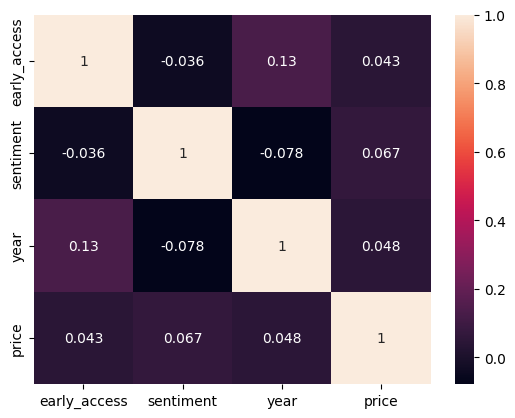

In [102]:
# df_aux = cleanedGamesDf[['discount_price', 'early_access', 'sentiment', 'year', 'price']]
df_aux = cleanedGamesDf[['early_access', 'sentiment', 'year', 'price']]

# df_aux.corr()

sns.heatmap(df_aux.corr(), annot=True)

---

**Graph??***

In [103]:
df_aux['price'].describe()

count    12486.000000
mean        10.454008
std         10.177777
min          0.000000
25%          3.990000
50%          7.990000
75%         14.990000
max         99.990000
Name: price, dtype: float64

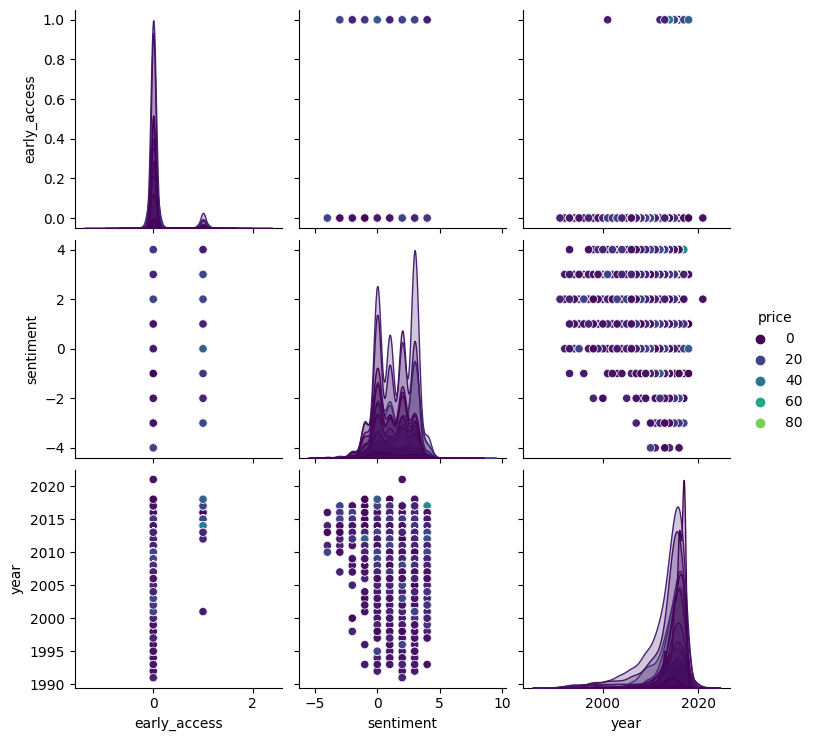

In [104]:
sns.pairplot(df_aux, hue = 'price', palette='viridis')
plt.show()

**PCA?????**

In [97]:
from sklearn.decomposition import PCA


---

# Modeling

Import modeling.

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [116]:
# cleanedGamesDf = cleanedGamesDf[cleanedGamesDf['year'] > 2000]

In [117]:
y = cleanedGamesDf['price']
# X = cleanedGamesDf.drop(columns='price')
# X = cleanedGamesDf[['discount_price', 'early_access', 'sentiment', 'year']]
# X = cleanedGamesDf[['early_access', 'sentiment', 'year']]
X = cleanedGamesDf.drop(columns=['discount_price', 'price'])

In [100]:
# cleanedGamesDf.columns

In [108]:
X.head()

,early_access,sentiment,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
5,0,0,2018,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
27,0,3,1997,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
28,0,4,1998,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
33,0,1,2018,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38,0,0,2018,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [109]:
y.head()

5     3.99
27    9.99
28    9.99
33    0.99
38    0.99
Name: price, dtype: float64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [119]:
X_test.head()

,early_access,sentiment,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,...,specs_Single-player,specs_Stats,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Valve Anti-Cheat enabled
21926,0,3,2016,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
13813,0,2,2017,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
32038,0,1,2006,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9552,0,1,2017,0,0,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0
2512,0,1,2014,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0


In [112]:
y_test.head()

18621    29.99
2832      5.99
28651     4.99
28677     4.99
13799     1.29
Name: price, dtype: float64

In [120]:
def check_pred(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print('RMSE', rmse)
    print('R2', r2_score(y_true, y_pred))
    print(pd.DataFrame(y_pred, y_true).head(10))
    fig = plt.Figure()
    ax = plt.axes()
    ax.scatter(y_true, y_pred, marker = '.')
    ax.set_xlabel('True')
    ax.set_ylabel('Prediction')
    ax.plot(np.linspace(0,100), np.linspace(0,100), c = 'red')
    return rmse

RMSE 10.574687456650727
R2 0.004900667585610807
           0
price       
4.99   19.99
0.99    2.99
4.99    4.99
5.99    9.99
24.99   7.99
3.99    4.99
9.99    9.99
9.99    9.99
1.99    0.99
9.99    3.99


10.574687456650727

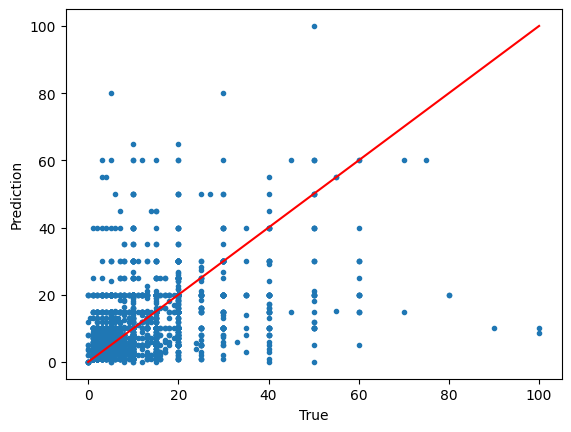

In [121]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)
check_pred(y_test, y_pred_dtr)

RMSE 7.74235599702056
R2 0.46656976593015065
               0
price           
4.99   11.620000
0.99    2.843333
4.99    5.888333
5.99    5.830000
24.99  12.053333
3.99    5.890600
9.99    9.261200
9.99    9.012222
1.99    6.240000
9.99    4.998333


7.74235599702056

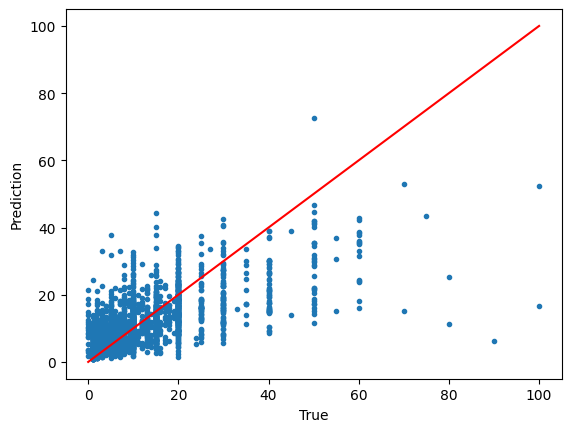

In [122]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
check_pred(y_test, y_pred_rfr)

In [109]:
rfr = RandomForestRegressor()

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

params = {
              # 'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
              'n_estimators': [100],
               'max_features': [1.0, 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rs_rfr = RandomizedSearchCV(rfr,
                      param_distributions=params,
                      n_iter = 10,
                    #   scoring='accuracy',
                      cv=3, verbose=2)

rs_rfr.fit(X_train, y_train)

# gs_rfr = GridSearchCV(rfr,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5, verbose=2)
# gs_rfr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=110, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END bootstrap=False, max_depth=110, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  31.8s
[CV] END bootstrap=False, max_depth=110, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

KeyboardInterrupt: 

In [110]:
rs_rfr.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

RMSE 7.194524943041233
R2 0.47993077774798554
               0
price           
0.99   14.243200
4.99    5.819000
19.99  14.989000
39.99  17.330000
3.99    8.698333
9.99    8.920000
4.99    8.280100
0.99    4.400000
9.99    7.042500
9.99   10.700000


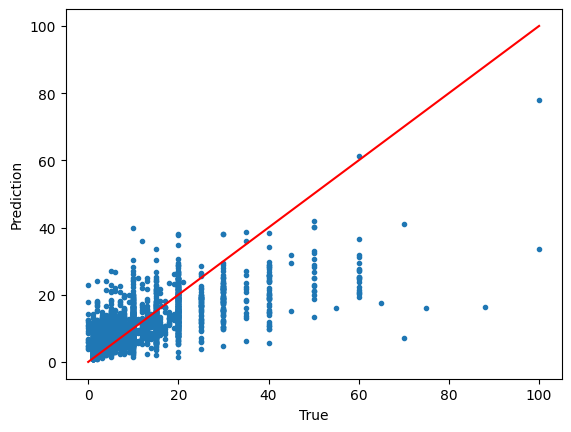

In [ ]:
y_pred_rs_rfr = rs_rfr.predict(X_test)
check_pred(y_test, y_pred_rs_rfr)

In [ ]:
y_test.shape

(3127,)

**Error is high**

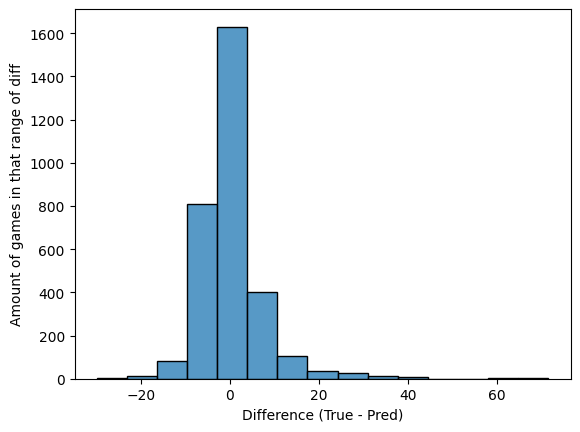

In [ ]:
# y_test, y_pred_rs_rfr

y_diff = y_test - y_pred_rs_rfr

fig = plt.Figure()
ax = plt.axes()
sns.histplot(data=y_diff, bins = 15)
ax.set_xlabel('Difference (True - Pred)')
ax.set_ylabel('Amount of games in that range of diff')
plt.show()

In [ ]:
(y_test == 0).sum()

19

In [140]:
y_test.mean()

10.445954589063

### Tunning with best hyperparameters

In [111]:
"""
 {'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}
"""

best_rfr = RandomForestRegressor(n_estimators = 100, min_samples_split =2, min_samples_leaf = 1,
    max_features = 'sqrt', max_depth = 80, bootstrap = True, random_state=0)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features='sqrt', random_state=0)

RMSE 7.180374226957568
R2 0.4819745859246922
               0
price           
0.99   12.130100
4.99    5.520100
19.99  15.942000
39.99  22.420000
3.99    8.230100
9.99   10.160000
4.99    9.020000
0.99    4.920000
9.99    6.646667
9.99   10.936767


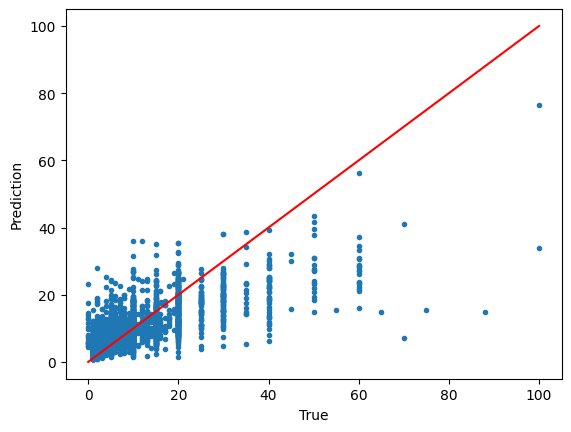

In [112]:
y_pred_best_rfr = best_rfr.predict(X_test)
final_RMSE = check_pred(y_test, y_pred_best_rfr)

# Export ML Model

In [113]:
import pickle

# save the model to disk
fname = 'Steam_Games_Model_SB.sav'
pickle.dump(best_rfr, open(fname, 'wb'))

Test

In [ ]:
# X.columns.to_list()

In [114]:
# Save a copy of name columns and order, and also RMSE onto a JSON.
import json

dic = {
    "RMSE" : final_RMSE,
    "Features" : X.columns.to_list(),
    "SentimentDict" : sentimentDict
    }

with open("Steam_Games_Model_Misc.json", "w") as outfile:
    json.dump(dic, outfile)


In [145]:
def prediccion(earlyaccess: bool, sentiment: str, year: int, genre: list, tags: list, specs: list):
    """
    Ingresando estos parámetros, deberíamos recibir el precio y RMSE.

    Input example:
    prediccion(
        earlyaccess=False,
        sentiment= 'Mostly Positive',
        year=2018,
        genre=['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
        tags=['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
        specs=['Single-player']
    )
    """
    import pickle
    import json
    import numpy as np

    # Open saved model
    fname = 'Steam_Games_Model_SB.sav'
    steam_games_price_model = pickle.load(open(fname, 'rb'))

    # Read extra Misc information, RMSE, name of features and Sentiment Dictionary.
    with open("Steam_Games_Model_Misc.json") as json_file:
        misc_dict = json.load(json_file)
    
    rmse = misc_dict["RMSE"]
    feat_names = misc_dict["Features"]
    sentiment_dict = misc_dict["SentimentDict"]
    print(feat_names)

    # Prepare data
    # TODO: Would like to put this on a Pipeline instead of doing this.

    # First let's create the x feature list and start putting its values.
    x = []
    
    # TODO VALIDATE
    if earlyaccess in (0, 1):
        x.append(earlyaccess)
    else:
        print("Error: Insert boolean value.")

    # For the sentiment one we should convert it to the same number we used before.
    if sentiment in sentiment_dict.keys():
        x.append(sentiment_dict[sentiment])
    else:
        x.append(0)

    if year > 1969 and year < 2024:
        x.append(year)
    else:
        print("Error: insert correct year as an int.")

    feat_names.remove("early_access")
    feat_names.remove("sentiment")
    feat_names.remove("year")

    for f in feat_names:
        if f.startswith("genre_"):
            f_aux = f.replace("genre_", "")
            x.append(f_aux in genre)

        elif f.startswith("tags_"):
            f_aux = f.replace("tags_", "")
            x.append(f_aux in tags)

        elif f.startswith("specs_"):
            f_aux = f.replace("specs_", "")
            x.append(f_aux in specs)
        else:
            x.append(0)
    
    # Make an array
    x = np.array(x).reshape(1, -1)

    pred_price = float(steam_games_price_model.predict(x))

    return {"Price" : pred_price, "RMSE": rmse}

prediccion(
    earlyaccess=False,
    sentiment= 'Mostly Positive',
    year=2018,
    genre=['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
    tags=['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
    specs=['Single-player']
)

['early_access', 'sentiment', 'year', 'genre_Accounting', 'genre_Action', 'genre_Adventure', 'genre_Animation & Modeling', 'genre_Audio Production', 'genre_Casual', 'genre_Design & Illustration', 'genre_Early Access', 'genre_Education', 'genre_Free to Play', 'genre_Indie', 'genre_Massively Multiplayer', 'genre_Photo Editing', 'genre_RPG', 'genre_Racing', 'genre_Simulation', 'genre_Software Training', 'genre_Sports', 'genre_Strategy', 'genre_Utilities', 'genre_Video Production', 'genre_Web Publishing', 'tags_1980s', "tags_1990's", 'tags_2.5D', 'tags_2D', 'tags_2D Fighter', 'tags_3D Platformer', 'tags_3D Vision', 'tags_4 Player Local', 'tags_4X', 'tags_6DOF', 'tags_Abstract', 'tags_Action', 'tags_Action RPG', 'tags_Action-Adventure', 'tags_Adventure', 'tags_Agriculture', 'tags_Aliens', 'tags_Alternate History', 'tags_America', 'tags_Animation & Modeling', 'tags_Anime', 'tags_Arcade', 'tags_Arena Shooter', 'tags_Artificial Intelligence', 'tags_Assassin', 'tags_Asynchronous Multiplayer', '

C:\Users\Sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'Price': 9.242366666666673, 'RMSE': 7.180374226957568}

In [23]:
False in (0, 1)

True

# Trash

**SCALING???**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# # from sklearn.pipeline import Pipeline
# # from sklearn.preprocessing import MinMaxScaler

# # knn_pipe = Pipeline([('mms', MinMaxScaler()),
# #                      ('knn', KNeighborsClassifier())])

# params = [{'knn__n_neighbors': [3, 5, 7, 9],
#          'knn__weights': ['uniform', 'distance'],
#          'knn__leaf_size': [15, 20]}]gs_knn = GridSearchCV(knn_pipe,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# gs_knn.fit(X_train, y_train)
# gs_knn.best_params_Output:
# {'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}# find best model score
# gs_knn.score(X_train, y_train)

In [ ]:
# dtr = DecisionTreeRegressor(random_state=0)

# # params = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
# #          'splitter': ['best', 'random'],
# #          'max_depth': np.arange(5, 20, 1),
# #          'min_samples_split': np.arange(1, 5, 1),
# #          'min_samples_leaf': np.arange(1, 5, 1)
# #          }]

# # params={"splitter":["best","random"],
# #             "max_depth" : [1,3,5,7,9,11,12],
# #            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
# #            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
# #            "max_features":["auto","log2","sqrt",None],
# #            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# params = [{'criterion': ['squared_error'],
#          'splitter': ['best',"random"],
#          'max_depth': np.arange(5, 15, 2)}]

# gs_dtr = GridSearchCV(dtr,
#                       param_grid=params,
#                     #   scoring='accuracy',
#                       cv=5, verbose=2)

# gs_dtr.fit(X_train, y_train)

In [ ]:
# gs_dtr.best_params_

In [ ]:
# y_pred_gs_dtr = gs_dtr.predict(X_test)
# check_pred(y_test, y_pred_gs_dtr)